In [57]:
import tensorflow as tf
import optimization
import matplotlib.pyplot as plt
from sklearn import datasets
from utils import train, plot_decision
import datetime

In [58]:
X, Y = datasets.make_moons(n_samples=6_000, noise=0.3, random_state=0)

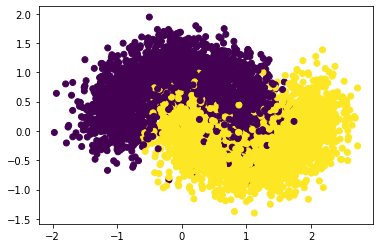

In [65]:
plt.scatter(X[:, 0], X[:, 1], c=Y.ravel())

Epoch 0: train cost = 0.6677729487419128
Epoch 1: train cost = 0.6268333792686462
Epoch 2: train cost = 0.4706744849681854
Epoch 3: train cost = 0.5390717387199402
Epoch 4: train cost = 0.420227974653244
Epoch 5: train cost = 0.4555172026157379
Epoch 6: train cost = 0.46641620993614197
Epoch 7: train cost = 0.5032508373260498
Epoch 8: train cost = 0.5367172360420227
Epoch 9: train cost = 0.4022846221923828
Epoch 10: train cost = 0.34275004267692566
Epoch 11: train cost = 0.33128440380096436
Epoch 12: train cost = 0.4476105272769928
Epoch 13: train cost = 0.4026576578617096
Epoch 14: train cost = 0.5445411801338196
Epoch 15: train cost = 0.41704943776130676
Epoch 16: train cost = 0.28826048970222473
Epoch 17: train cost = 0.23532867431640625
Epoch 18: train cost = 0.2946643829345703
Epoch 19: train cost = 0.2766707241535187
Epoch 20: train cost = 0.3435594141483307
Epoch 21: train cost = 0.33411478996276855
Epoch 22: train cost = 0.255086749792099
Epoch 23: train cost = 0.38403311371803

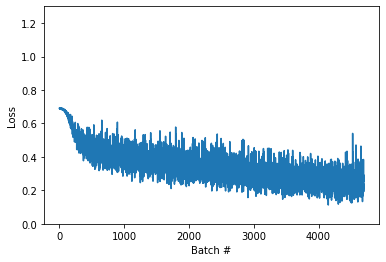

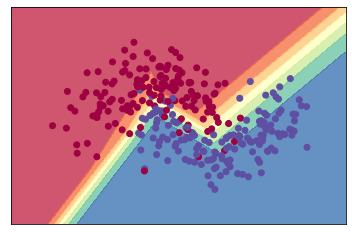

In [62]:
tf.random.set_seed(42)

loss = tf.keras.losses.BinaryCrossentropy()

dataset = tf.data.Dataset.from_tensor_slices(
    (tf.cast(X, dtype=tf.float32), tf.cast(Y, dtype=tf.int32))
    ).shuffle(X.shape[0]).batch(64)

inputs = tf.keras.Input(shape=(2,))
x = tf.keras.layers.Dense(3, activation='relu')(inputs)
x = tf.keras.layers.Dense(3, activation='relu')(x)
x = tf.keras.layers.Dense(3, activation='relu')(x)
outputs = tf.keras.layers.Dense(1, activation='sigmoid')(x)

clf = tf.keras.Model(inputs=inputs, outputs=outputs)

train(
    NN=clf,
    dataset=dataset,
    loss=loss,
    optimizer=tf.keras.optimizers.Adam(),
    epochs=50
)

plot_decision(clf, X, Y)